In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('ev_cleaned_data')
df.head()

,company,name,price,rating,rating_count,review_count
0,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,104900,4.2,215,39
1,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39
2,Ampere,Ampere Primus Booking for Ex-Showroom Price (W...,146355,4.2,215,39
3,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,100900,4.2,215,39
4,Ampere,Ampere Magnus EX Booking for Ex-Showroom Price...,100900,4.2,215,39


In [4]:
df.tail()

,company,name,price,rating,rating_count,review_count
55,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.4,528,84
56,Vida,VIDA Powered by Hero V1 Plus Booking for Ex-Sh...,145000,4.0,16,1
57,Vida,VIDA Powered by Hero V1 Plus Booking for Ex-Sh...,145000,4.0,16,1
58,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.4,528,84
59,Vida,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.4,528,84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       60 non-null     object 
 1   name          60 non-null     object 
 2   price         60 non-null     int64  
 3   rating        60 non-null     float64
 4   rating_count  60 non-null     int64  
 5   review_count  60 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.9+ KB


Here we have <b>six</b> columns, <b>two</b> contain categorical data and <b>four</b> contain numeric data 
<li> Numerical Columns: Price, Rating, Rating Count, Review Count </li>
<li> Categorical Columns: Company, Name </li>

In [6]:
df.describe()

,price,rating,rating_count,review_count
count,60.000000,60.000000,60.000000,60.000000
mean,113735.933333,4.120000,92.750000,16.216667
std,25444.824439,0.309072,150.851215,23.571091
min,74499.000000,3.600000,3.000000,0.000000
25%,93999.000000,3.900000,12.000000,4.000000
50%,109604.000000,4.050000,25.000000,5.000000
75%,134514.000000,4.325000,60.000000,16.000000
max,146355.000000,5.000000,528.000000,84.000000


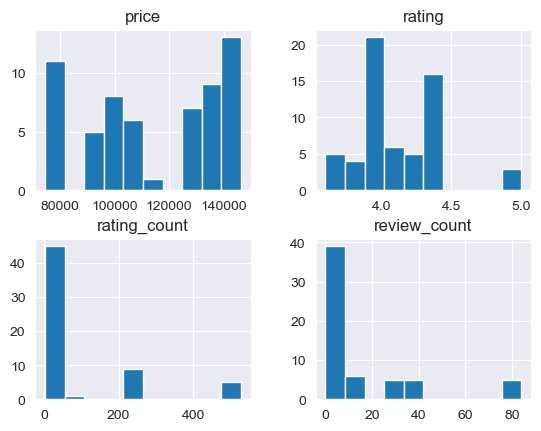

In [7]:
# creating a histogram
df.hist();
plt.show();

<b>Inference</b>
- price: Data has more records towards the *min* and *max* and relatively lesser number of records around the middle of the data
- rating: Most of the records have the rating of `4.0` and `4.4` is the second in terms of record frequency. <br> There are no records in the rating range of `4.5` to `4.9`
- review_count: Here the review counts are spread around from `0-80` but a large amount of records fall under the `0` review range

In [8]:
df.company.value_counts()

company
Okaya              24
Bgauss             19
Vida                8
Ampere              5
Joy                 3
Bounce Infinity     1
Name: count, dtype: int64

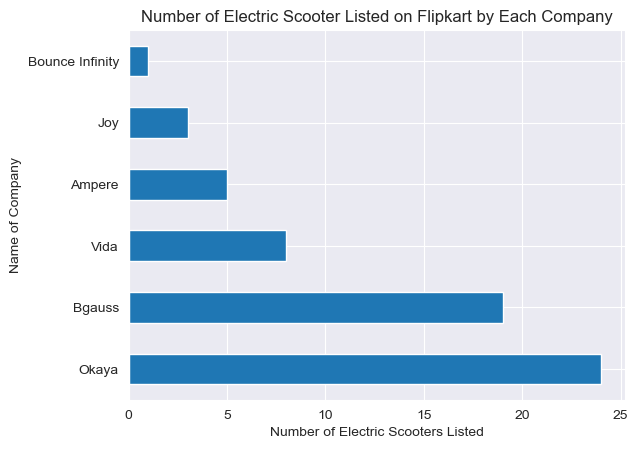

In [74]:
df.company.value_counts().plot( kind= 'barh');
plt.title("Number of Electric Scooter Listed on Flipkart by Each Company")
plt.xlabel('Number of Electric Scooters Listed')
plt.ylabel('Name of Company')
plt.show()

In terms of company:
- Okaya has the most Electric Scooters listed on Flipkart
- BGauss at second place
- Bounce Infinity being the least in terms of number i.e 1

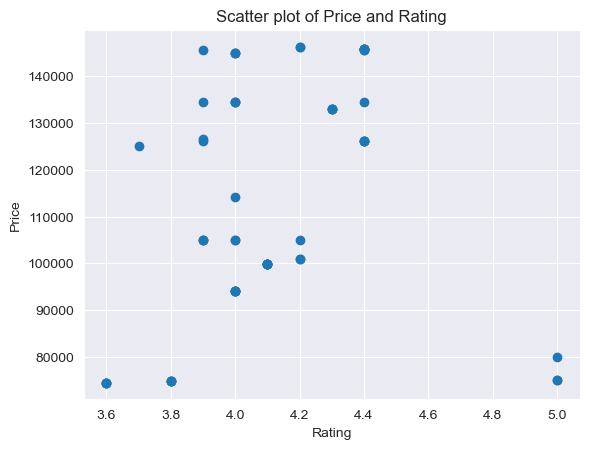

In [75]:
plt.scatter(df.rating,df.price)
plt.title("Scatter plot of Price and Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

<b>Inference:</b>
- Here we can see that Price and Rating have positive correlation as Increase in Price also displayed increase in Rating
- There are a few exceptions to this case where a few 5 star review come from a lower price range and that can be something that we can look into in the future

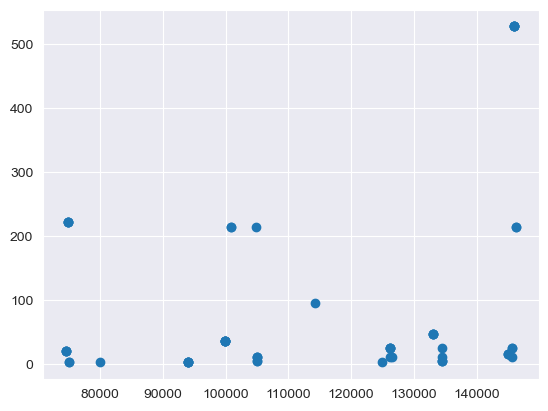

In [81]:
plt.scatter(df.price,df.rating_count)

In [ ]:
<b>Inference:</b>
- There isnt't a strong correlatio

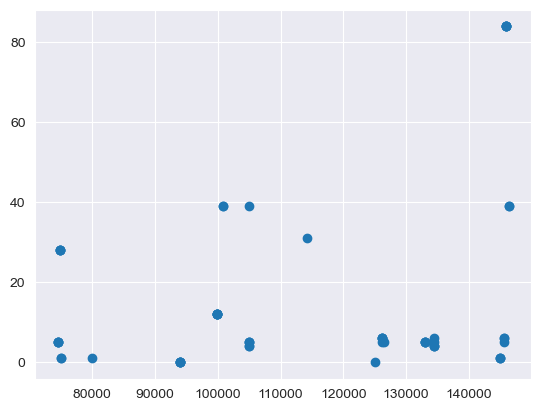

In [77]:
plt.scatter(df.price, df.review_count)